In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset

In this tutorial, we are going to use the MNIST dataset. The dataset consists of handwritten digits. It has a total of 60000 training images and 10000 testing images.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Let's visualize some examples of the dataset

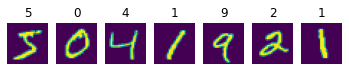

In [6]:
fig, ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [7]:
print('Training samples : ', len(x_train))
print('Test samples : ', len(x_test))

print('Tensor size : ', x_train[0].shape)
print('First 10 digits are : ', y_train[:10])
print('Type of data is ', type(x_train))

Training samples :  60000
Test samples :  10000
Tensor size :  (28, 28)
First 10 digits are :  [5 0 4 1 9 2 1 3 1 4]
Type of data is  <class 'numpy.ndarray'>


In [8]:
print('Min intensity value : ', x_train.min())
print('Max intensity value : ', x_train.max())

Min intensity value :  0
Max intensity value :  255


To feed our images to the neural network, we need to make sure that all values are scaled to the range `0 - 1`. Let's rescale the dataset in order to have all values in the required normalized range 

In [9]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

# Training a dense neural network

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

# Model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We can get the weight matrix and bias from the layers property. Let's see the weights of the Dense layer which is the second layer 

In [11]:
model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.01472474, -0.00094076,  0.03981144, ...,  0.04272027,
         -0.08114503,  0.06334686],
        [-0.07836632,  0.07420918,  0.03952418, ..., -0.07907709,
          0.0804236 ,  0.06702217],
        [-0.05323402,  0.01400997, -0.04517786, ...,  0.07913355,
         -0.08049355,  0.01082127],
        ...,
        [-0.00587871, -0.02135097, -0.04562046, ...,  0.03124026,
          0.01220932, -0.0152332 ],
        [-0.03079823, -0.02848319, -0.05078797, ...,  0.00080046,
         -0.05960741,  0.04593363],
        [-0.07389802,  0.01596464, -0.04468258, ..., -0.08288426,
          0.08173994,  0.00957492]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [12]:
# The optimizer will be used to minimize the error
# The loss function will be used on the output of the network to obtain the error, which we will then minimize

model.compile(optimizer='sgd', loss='categorical_crossentropy')

We need to provide an output for each training sample. We have multi-class classification problem since the network outputs probabilities for each digit from 0 to 9. Let's one-hot-encode training labels using Keras API

In [14]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First 3 training labels : ", y_train[:3])
print("One-hot-encoded version : \n", y_train_onehot[:3])

First 3 training labels :  [5 0 4]
One-hot-encoded version : 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Let's now train our model

In [15]:
model.fit(x_train, y_train_onehot)

1875/1875 [==============================] - 24s 10ms/step - loss: 0.7731


This training only loops through the dataset once (one epoch). For the next training, we'll train for several epochs and we'll also evaluate the quality on test dataset. 

In [16]:
hist = model.fit(x_train, y_train_onehot, validation_data=(x_test, y_test_onehot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4547 - val_loss: 0.3989
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4027 - val_loss: 0.3663
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3766 - val_loss: 0.3481


The fit method returns the history object that contains the loss data for each training epoch. It can be used to visualize the loss on the graph

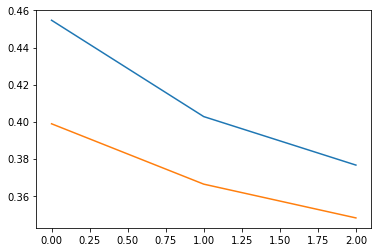

In [17]:
for x in ['loss', 'val_loss']:
    plt.plot(hist.history[x])

The value of the loss function does not tell us a lot about the accuracy of the model. To measure accuracy, we'd want to see the percentage of correctly classified digits from the test dataset. We can add accuracy as metric during dataset compilation

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
hist = model.fit(x_train, y_train_onehot, validation_data=(x_test, y_test_onehot), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 7s 14ms/step - loss: 0.3641 - acc: 0.9000 - val_loss: 0.3444 - val_acc: 0.9085
Epoch 2/3
469/469 [==============================] - 6s 13ms/step - loss: 0.3603 - acc: 0.9007 - val_loss: 0.3415 - val_acc: 0.9089
Epoch 3/3
469/469 [==============================] - 6s 13ms/step - loss: 0.3570 - acc: 0.9014 - val_loss: 0.3381 - val_acc: 0.9095


We also specified a batch_size to define the number of samples that are being processed by the neural network at once. Large minibatch size significantly speeds up learning process, but also makes it a litte bit less precise. This is due to the fact that the direction of optimization is selected for the whole minibatch, and not for each individual sample. Thus, choosing minibatch size is quite tricky, and it remains one of the hyperparameters that can be further optimized to achieve better performance

In order to do some fine-tuning to optimize parameters, or use custom loss function, we can use objects instead of string abbreviations. For this example, we'll use a variation of sgd which is called momentum SGD. The idea is that the gradients of loss function will be averaged over the last few steps in order to keep the momentum, and make optimization more smooth.  

In [20]:
model.compile(optimizer=keras.optimizers.SGD(momentum=0.5), loss='categorical_crossentropy', metrics=['acc'])
hist = model.fit(x_train, y_train_onehot, validation_data=(x_test, y_test_onehot), epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 16s 15ms/step - loss: 0.3508 - acc: 0.9021 - val_loss: 0.3287 - val_acc: 0.9106
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.3413 - acc: 0.9052 - val_loss: 0.3219 - val_acc: 0.9135
Epoch 3/5
938/938 [==============================] - 18s 20ms/step - loss: 0.3338 - acc: 0.9069 - val_loss: 0.3159 - val_acc: 0.9147
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.3276 - acc: 0.9081 - val_loss: 0.3112 - val_acc: 0.9148
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3226 - acc: 0.9096 - val_loss: 0.3068 - val_acc: 0.9167


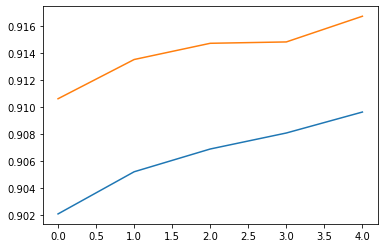

In [22]:
for x in ['acc', 'val_acc']:
    plt.plot(hist.history[x])

Let's visualize the weights of our neural network and see what they look like. When the network is more complex than just one layer, making sense of the weight data is more difficult. 

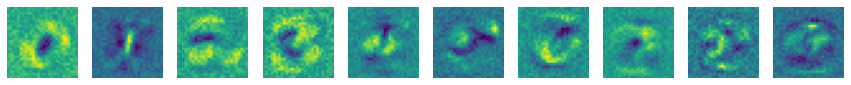

In [24]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28, 28, 10)
fig, ax = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

# Multi-layer networks

After training a one-layer dense neural networkn let's see if adding more layers wil give us better performance in terms of accuracy. 

In a multi-layer network, we will add one or more hidden layers. This layer may contain any number of neurons, which will affect how powerful the neural network is. The more parameters there are in the network - the more data we need to train it

A number of parameters of a neural network should be chosen depending on the dataset size to prevent overfitting.

Non-linear activation functions are one of the reasons neural networks achieve high expressive power. When we do not specify non-linear activation, two layers are equivalent to one layer. The most frequently used activation functions are ReLU and Sigmoid

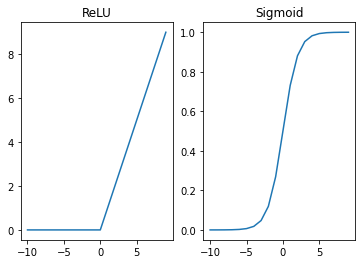

In [25]:
def plot_function(f, name=''):
    plt.plot(range(-10,10), [f(tf.constant(x, dtype=tf.float32)) for x in range(-10, 10)])
    plt.title(name)
    
plt.subplot(121)
plot_function(tf.nn.relu, 'ReLU')
plt.subplot(122)
plot_function(tf.nn.sigmoid, 'Sigmoid')

Let's define our network by initializing the model object first and then adding all layers one by one.

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


We did not use softmax as the activation function after the last layer. Keras allows us to combine the activation function together with loss function which means we just need to make sure and specify `from_logits=True` flag when defining loss function in compile.

In most of the cases when we have a multi-class classification, our dataset contains the number of class, which we then convert to one-hot encoding. This uses quite a lot of extra memory and we can in fact define the loss function is such a way that it will expect the number of class, instead of the corresponding one-hot-vector. This loss function is called sparese categorical cross-entropy

In [28]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [29]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2717 - acc: 0.9217 - val_loss: 0.1567 - val_acc: 0.9534
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1283 - acc: 0.9621 - val_loss: 0.1277 - val_acc: 0.9640
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0968 - acc: 0.9724 - val_loss: 0.1023 - val_acc: 0.9712
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0797 - acc: 0.9775 - val_loss: 0.1045 - val_acc: 0.9715
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0684 - acc: 0.9810 - val_loss: 0.0996 - val_acc: 0.9726


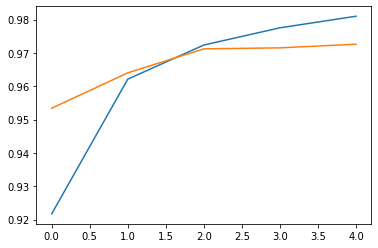

In [30]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

Multi-level networks can achieve higher accuracy than single-layer perceptron, however, they are not perfect for computer vision tasks. In images, there are some structural patterns that can help us classify object regardless of its position in the image, but perceptrons do not allow us to extract those patterns and look for them selectively. 

# Convolutional neural networks

CNN are specifically designed for computer vision. To extract patterns, we will use the notion of convolutional filters. We will import `tfcv`, a helper librabry that contain some useful functions 

In [31]:
!wget -O tfcv.py -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/computer-vision-tf/tfcv.py

In [32]:
from tfcv import *

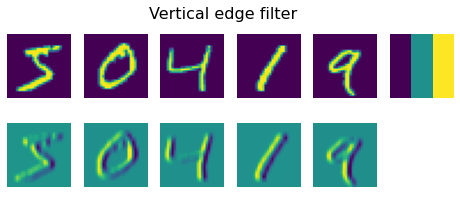

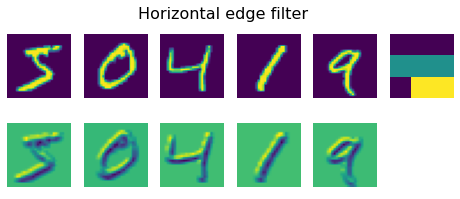

In [34]:
plot_convolution(x_train[:5],[[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]], 'Vertical edge filter')
plot_convolution(x_train[:5],[[-1.,-1.,-1.],[0.,0.,0.],[-1.,1.,1.]], 'Horizontal edge filter')

In classical computer vision, multiple filters were applied to the image to generate features, which were used by machine learning algorithm to build a classifier. In deep learning, we construct networks that learn the best convolutional filters to solve classification problem on its own

Convolutional layers are defined using `Conv2d` class. We need to specify the following :
* filters - number of filter to use. 
* kernel_size is the size of the sliding window. 

In [37]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 9)         234       
_________________________________________________________________
flatten_3 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                51850     
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
_________________________________________________________________


We need to reshape our data before starting training

In [38]:
x_train_c = np.expand_dims(x_train, 3)
x_test_c = np.expand_dims(x_test, 3)

hist = model.fit(x_train_c, y_train, validation_data=(x_test_c, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 48s 23ms/step - loss: 0.1970 - acc: 0.9438 - val_loss: 0.0937 - val_acc: 0.9719
Epoch 2/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0908 - acc: 0.9740 - val_loss: 0.0751 - val_acc: 0.9775
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0695 - acc: 0.9799 - val_loss: 0.0585 - val_acc: 0.9817s - loss: 0.0694 - acc: 0.97


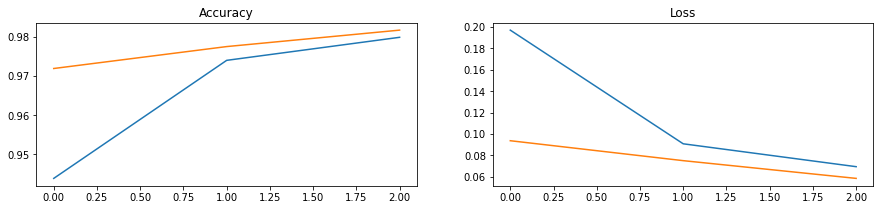

In [39]:
plot_results(hist)

We were able to achieve higher accuracy with fewer epochs compared to the fully-connected networks from the previous unit.

# Multi-layered CNNs and pooling layers

Pooling layers help scale down the size of images. We can use of the following pooling layers : 
- Average Pooling takes a sliding window (for example, 2x2 pixels) and computean average of values within the window
- Max Pooling replaces the window with the maximum value. The idea behind max pooling is to detect a presence of a certain pattern within the sliding window. 

In [41]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3210      
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
____________________________________________________

In [42]:
hist = model.fit(x_train_c, y_train, validation_data=(x_test_c, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 53s 27ms/step - loss: 0.2120 - acc: 0.9380 - val_loss: 0.0750 - val_acc: 0.9771
Epoch 2/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0759 - acc: 0.9771 - val_loss: 0.0563 - val_acc: 0.9813
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0556 - acc: 0.9829 - val_loss: 0.0464 - val_acc: 0.9855


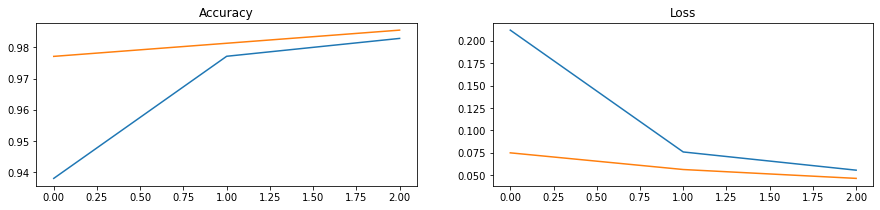

In [43]:
plot_results(hist)

The accuracy is better with more than one layer and a smaller number of epochs

# CNN on CIFAR-10 dataset

In [44]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

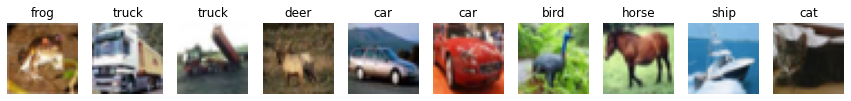

In [45]:
display_dataset(x_train, y_train, classes=classes)

A well-known architecture for CIFAR-10 is called LeNet and has been proposed by Yann LeCun. It follows the same principles as the model we are going to use. The main difference being 3 input color channels instead of 1

In [46]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, strides=1, activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.6351 - acc: 0.3982 - val_loss: 1.4117 - val_acc: 0.4862
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3580 - acc: 0.5098 - val_loss: 1.2688 - val_acc: 0.5467
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2255 - acc: 0.5646 - val_loss: 1.2854 - val_acc: 0.5512
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1380 - acc: 0.5948 - val_loss: 1.1520 - val_acc: 0.5890
Epoch 5/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.0782 - acc: 0.6174 - val_loss: 1.2063 - val_acc: 0.5788
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0207 - acc: 0.6380 - val_loss: 1.1298 - val_acc: 0.6008
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9805 - acc: 0.6539 - val_loss: 1.0878 - val_acc: 0.6181
Epoch 8/10
1563/1563 [==========================

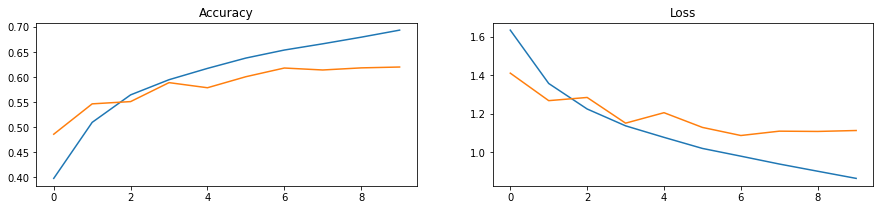

In [48]:
plot_results(hist)

We get around 62% accuracy on the validation set, which is not that bad.